In [45]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import time

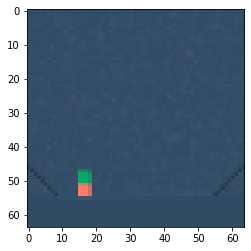

In [73]:
from vqvae.envs.stacker import RefTwoBlocksEnv

env = RefTwoBlocksEnv()

obs = env.reset()

kwargs = dict(width=64,height=64,camera_id=0)

box1_pos = env.data.geom_xpos["box1"].copy()
env.set_block_pos(box0=[box1_pos[0],None,env.box_size*3])
#env.set_block_pos(box0=[-.52,None,env.box_size+.88])
img = env.render(**kwargs)
plt.imshow(img)

In [72]:
box1_pos = env.data.geom_xpos["box1"].copy()
box0_pos = env.data.geom_xpos["box0"].copy()
np.linalg.norm(box0_pos-box1_pos)


0.06600000000000006

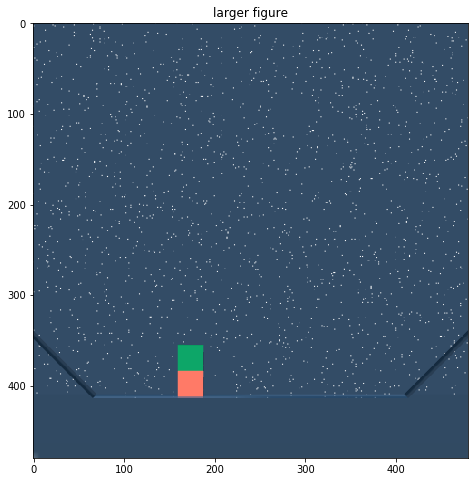

In [49]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from dm_control import suite
#env = suite.load('stacker','stack_2_blocks')

#obs = env.reset()

#kwargs = dict(width=128,height=128,camera_id=0)
#img = env.physics.render(**kwargs)

fig2 = plt.figure(figsize = (8,8)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(img, interpolation='none')
ax3.set_title('larger figure')

plt.show()

In [4]:
np.linalg.norm(obs_dict['achieved_goal']-obs_dict['desired_goal'])

0.2323025

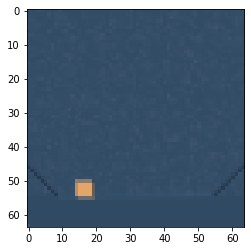

In [5]:
kwargs = dict(width=64,height=64,camera_id=0)
plt.imshow(env.block_env.render(**kwargs))

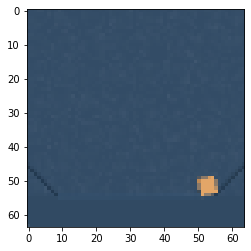

In [3]:
from vqvae.envs.utils import RefBlockEnv

env = RefBlockEnv()
env.dm_env.reset()
env.set_block_pos(x=.5,z=.2)
render_kwargs = dict(width=64,height=64,camera_id=0)
img0 = env.render(**render_kwargs)
imgs = []
for _ in range(100):
    a = np.random.uniform(-1,1,env.dm_env.action_spec().shape)
    env.dm_env.step(a)
    img = env.render(**render_kwargs)
    imgs.append(img)
    
plt.imshow(img)

0.010987520217895508


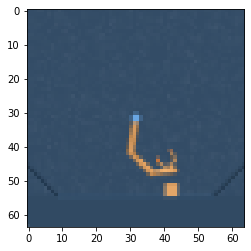

In [4]:
from dm_control import suite
env = suite.load('stacker','push_1')
qpos = env.physics.named.data.qpos
physics = env.physics 
render_kwargs = dict(width=64,height=64,camera_id=0)

img0 = env.physics.render(**render_kwargs)
s = time.time()
env.reset()
print(time.time()-s)
imgs = []
for _ in range(100):
    a = np.random.uniform(-1,1,env.action_spec().shape)
    env.step(a)
    img = env.physics.render(**render_kwargs)
    imgs.append(img)

plt.imshow(img)

In [5]:
data = np.load('/home/misha/research/vqvae/data/single_block_length100_paths_10.npy',allow_pickle=True)

imgs = data.item().get("image_observation")

In [6]:
len(imgs)

1000

-0.05843697896201359
-0.0563042299962047
-0.05411265729999314
-0.05247600587663904
-0.05139316560432193
-0.05067247717058309
-0.050256471714674275
-0.050140620719279674
-0.05032716001266068
-0.05081941302645129
-0.05162130489521562
-0.052737239456731755
-0.053206018514223956
-0.05298057112658556
-0.05287432496673829
-0.05309973780204505
-0.05365754065835163
-0.054166709422966954
-0.053316463980102084
-0.051786137604450125
-0.05056596133947473
-0.04963266834313997
-0.04898454124423632
-0.04862218002694704
-0.0485463917620774
-0.04875860862571633
-0.04926136479805338
-0.05005846779992298
-0.05115483818585699
-0.0525560184876572
-0.05424972826729482
-0.05610937624286001
-0.05786928764260413
-0.05813778513190283
-0.05796947648371189
-0.05785075694707272
-0.05778690225494198
-0.0577542729367792
-0.057737661627434496
-0.05745295745062138
-0.05753344505797846
-0.05759491965820459
-0.05732992647478486
-0.057352547500953914
-0.057358767351437995
-0.05735695385689382
-0.05735491068580788
-0.0573

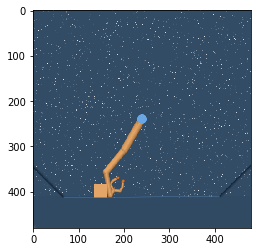

In [8]:
from vqvae.envs.utils import SimpleGoalEnv

env = SimpleGoalEnv(obs_dim=42,goal_dim=3,env_name='stacker',task='push_1')

obs_dict0 = env.reset()
imgs=[]
img0 = env.physics.render(480,480,0)
for _ in range(100):
    a = env.action_space.sample()
    obs_dict,r,d,info = env.step(a)
    distance = np.linalg.norm(
            obs_dict["desired_goal"] - obs_dict["achieved_goal"])
    print(r)
    img = env.physics.render(480,480,0)
    imgs.append(img)
print('achieved_goal',obs_dict0['achieved_goal'])
print('desired_goal',obs_dict0['desired_goal'])
list_to_vid('video',imgs)
plt.imshow(img0)

In [35]:
import skvideo.io
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont
 
def list_to_vid(name,imgs,img_dim=480):
    n = img_dim#imgs[0].shape[0]
  
    imgs = np.array(imgs)
    outputdata = imgs
    outputdata = outputdata.astype(np.uint8)
    outputdict={}
    outputdict["-pix_fmt"]='yuv420p'
    skvideo.io.vwrite(name+".mp4",outputdata, outputdict=outputdict)

def toggle_magnet(env):
    current_pos = env.physics.data.qpos.copy()
    magnet_state = env.physics.named.model.eq_active[0].copy()
    
    with env.physics.reset_context():
        for i in range(len(current_pos)):
            env.physics.data.qpos[i]=current_pos[i]
        env.physics.named.model.eq_active[0]= np.abs(magnet_state-1)
        


In [40]:
from dm_control import suite
import numpy as np
env = suite.load('stacker','stack_2_blocks')

model = env.physics.named.model

act_dim = env.action_spec().shape
imgs = []

kwargs = dict(width=64,height=64,camera_id=0)
#toggle_magnet(env)
ts = env.reset()

for i in range(200):
    a = np.random.uniform(-1,1,act_dim) + [1,.3,0]
    ts = env.step(a)
    #if i == 50:
    #    toggle_magnet(env)
    #if i == 100:
    #    toggle_magnet(env)
        
    img = env.physics.render(**kwargs)
    imgs.append(img)

In [42]:
from vqvae.envs.stacker import StackerGoalEnv
import numpy as np
act_dim = 3
env = StackerGoalEnv(obs_dim=30, goal_dim=3,
                              env_name='stacker',
                              task='stack_2_blocks',
                              max_steps=200,
                              reward_type='pick_and_place_sparse',
                              threshold=0.05)

ts = env.reset()
imgs = []
for i in range(500):
    a = np.random.uniform(-1,1,act_dim) + [1,.3,0]
    
        
    ts = env.step(a)

    hand_pos = env.data.geom_xpos["hand"].copy()
    box_pos = env.data.geom_xpos["box0"].copy()
    distance = np.linalg.norm(hand_pos-box_pos)
    #print(i,distance)
    #if i == 50:
    
    #    toggle_magnet(env)
    #if i == 300:
    #    toggle_magnet(env)
        
    img = env.physics.render(**kwargs)
    imgs.append(img)

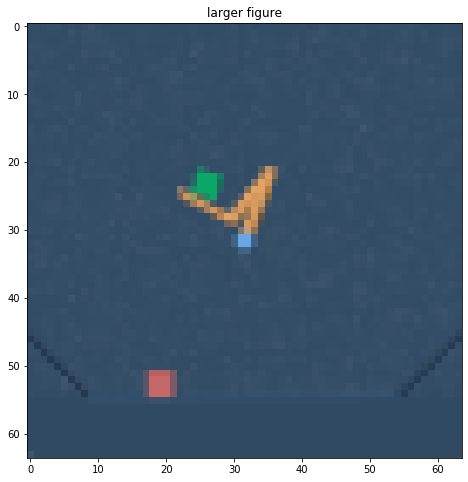

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from dm_control import suite

img = env.physics.render(**kwargs)

fig2 = plt.figure(figsize = (8,8)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(img, interpolation='none')
ax3.set_title('larger figure')
import numpy as np

plt.show()

In [44]:
list_to_vid('video',imgs)

In [55]:
np.concatenate([x.reshape(-1) for x in list(dict(ts.observation).values())]).shape

(28,)

In [86]:
from dm_control import suite
from dm_control import viewer

# Load an environment from the Control Suite.
env = suite.load(domain_name="stacker", task_name="stack_2_blocks")

# Launch the viewer application.
viewer.launch(env)

In [57]:
env.physics.named.data.geom_xpos

FieldIndexer(geom_xpos):
                x         y         z         
 0      floor [ 0         0         0       ]
 1      wall1 [-0.683     0         0.283   ]
 2      wall2 [ 0.683     0         0.283   ]
 3 background [ 0         0.2       0.5     ]
 4   arm_root [ 0         0         0.4     ]
 5  upper_arm [ 0.016     0         0.311   ]
 6 middle_arm [ 0.0236    0         0.148   ]
 7  lower_arm [-0.0388    0         0.0478  ]
 8       hand [-0.106     0         0.0152  ]
 9       box0 [ 0.251     0         0.033   ]
10       box1 [ 0.0671    0         0.033   ]

In [123]:
from rlsink.utils.data import load_data_and_data_loaders,load_model

data_file_path = '/home/misha/research/vqvae/data/reacher_no_target_length100_paths_50.npy'
model_filename = '/home/misha/research/vqvae/results/vqvae_data_reacher_aug7_ne128nd2.pth'


model,vqvae_data = load_model(model_filename)

tr_data, v_data, tr_loader, v_loader = load_data_and_data_loaders(data_file_path, 100,shuffle=False,include_state=True)

Loading data
Done loading data
Loading data
Done loading data


In [67]:
from torchvision.utils import make_grid
import torch 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def display_image_grid(x,nrow=8):
    x = make_grid(x.cpu().detach()+0.5,nrow=nrow)
    x = x.numpy()
    fig = plt.imshow(np.transpose(x, (1,2,0)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    
def reconstruct(data_loader,model):
    out = next(iter(data_loader))
    x = out[0]
    x = x.to(device)
    vq_encoder_output = model.pre_quantization_conv(model.encoder(x))
    _, z_q, _, _,e_indices = model.vector_quantization(vq_encoder_output)
    x_recon = model.decoder(z_q)

    return x,x_recon, z_q,e_indices



def normalize_tensor(x):
    x *=.5
    x+=.5
    x*=255.
    return x.int()

def de_normalize_tensor(x):
    x *=.5
    x+=.5
    x*=255.
    return x.int()
    

In [ ]:
x_val,x_val_recon,z_q,e_indices = reconstruct(v_loader,model)
z = model.pre_quantization_conv(model.encoder(x_val))
x_val = normalize_tensor(x_val)
print(x_val.type(),x_val_recon.shape,z_q.shape,e_indices.shape)
display_image_grid(x_val[:16],nrow=4)

In [146]:
def vqvae_encoder_for_cpc(x,model,batch_size,cpc_batch_size):
    x = x.to(device)
    z = model.pre_quantization_conv(model.encoder(x))
    return z.reshape(batch_size,cpc_batch_size,-1)
    

z = vqvae_encoder(x,model)
z=z.reshape(batch_size,cpc_batch_size,-1).detach().cpu().numpy()


In [149]:
for j in range(n_neg+2):
    d = np.linalg.norm(z[0][0]-z[0][j])
    #print(d)

In [4]:
from rlsink.utils.data import load_data_and_data_loaders,load_model

data_file_path = '/home/misha/research/vqvae/data/reacher_no_target_length100_paths_50.npy'
model_filename = '/home/misha/research/vqvae/results/vqvae_data_reacher_aug7_ne128nd2.pth'


model,vqvae_data = load_model(model_filename)

tr_data, v_data, tr_loader, v_loader = load_data_and_data_loaders(data_file_path, 100,shuffle=False,include_state=True)

Loading data
Done loading data
Loading data
Done loading data


In [13]:
import torch
import torchvision
import torch.utils.data
import random
from torch.utils.data.sampler import Sampler 

    
class RandomPathSampler(Sampler):
    r"""Samples elements sequentially, always in the same order.

    Arguments:
        data_source (Dataset): dataset to sample from
    """

    def __init__(self, 
                 data_source,
                 path_length=100):
        
        self.data_source = data_source
        self.path_length = path_length
        self.n_paths = len(self.data_source)//self.path_length
        
    def _reset_iterator(self):
        self.current_path_id = np.random.randint(self.n_paths)
        self.iterator = np.arange(self.path_length) + self.path_length*self.current_path_id
    

    def __iter__(self):
       
        self._reset_iterator()
        print(self.current_path_id)
        return iter(self.iterator)

    def __len__(self):
        return len(self.data_source)
    
class CPCSampler(Sampler):
    r"""Samples elements sequentially, always in the same order.

    Arguments:
        data_source (Dataset): dataset to sample from
    """

    def __init__(self, 
                 data_source,
                 path_length=100,
                 proximity_threshold=10,
                 n_negative=10,
                 batch_size=32,
                ):
        
        self.data_source = data_source
        self.path_length = path_length
        self.n_paths = len(self.data_source)//self.path_length
        self.proximity_threshold = proximity_threshold
        self.n_negative = n_negative
        self.batch_size = batch_size
        
    def _get_positive_samples(self):
        # path id
        n = np.random.randint(self.n_paths)
        # step ids
        m1 = self.path_length*n+ np.random.randint(self.path_length-self.proximity_threshold)
        m2 = m1 + np.random.randint(1,self.proximity_threshold+1)
        return [m1,m2]
    
    def _get_negative_samples(self,pos_index):
        neg_indices = []
        
        while len(neg_indices)< self.n_negative:
            index = np.random.randint(len(self.data_source))
            # check that sample isn't close using oracle 
            # [:2] is specific to Reacher
            pos_state = self.data_source.state_data[pos_index][:2]
            neg_state = self.data_source.state_data[index][:2]
            L2 = np.linalg.norm(pos_state-neg_state)
            if L2 > 0.05:
                neg_indices.append(index)
                
        return neg_indices
        
    def _one_batch(self):
        pos = self._get_positive_samples()
        neg = self._get_negative_samples(pos[0])
        return pos+neg

    def __iter__(self):
        
        minibatch = np.array([self._one_batch() for _ in range(self.batch_size)]).reshape(-1)
       
        
        return iter(minibatch)

    def __len__(self):
        return len(self.data_source)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
device = torch.device(
            "cuda") if torch.cuda.is_available() else torch.device("cpu")
def vqvae_encoder_for_cpc(x,model):
    x = x.to(device)
    z = model.pre_quantization_conv(model.encoder(x))
    return z
    
class CPC(nn.Module):
    
    def __init__(self,
                 z_dim=None,
                 cpc_batch=None,
                 batch_size=None,
                 loader=None,
                ):
        super(CPC, self).__init__()
        
        self.z_dim = z_dim
        self.cpc_batch = cpc_batch 
        self.batch_size = batch_size
        self.loader = loader
        
        self._check_inputs()

        self.z_dim = z_dim

        self.device = torch.device(
            "cuda") if torch.cuda.is_available() else torch.device("cpu")
        
        self.W = nn.Parameter(torch.rand(z_dim, z_dim),requires_grad=True)

    def _check_inputs(self):
        assert self.z_dim is not None
        assert self.cpc_batch is not None
        assert self.batch_size is not None
        assert self.loader is not None
        
    def forward(self,z_i,z_j):
        batch_size = z_i.shape[0]
        cpc_batch_size = z_j.shape[0]
        z_dim = z_i.shape[-1]
        
        z_i = z_i.view(z_dim,batch_size)

        right = torch.matmul(self.W,z_i)
        f = torch.bmm(z_j.view(batch_size,cpc_batch_size,z_dim),right.view(batch_size,z_dim,1))
        f_scores = f.squeeze(2)/1000
        
        return f_scores
    
    def naive_loss(self,z_t,z_others,verbose=False):
        z_t = z_t.view(128,1)
        z_others = z_others.view(51,128)
        left_side = torch.matmul(z_others,self.W)
        scores = torch.matmul(left_side,z_t)
        scores/=1000
        scores = scores.squeeze(1)
        positive = scores[0]
        
        
        
        loss = torch.log(torch.sum(torch.exp(scores)))- torch.log(torch.exp(positive))
        
        if verbose:
            print('LOSS')
            print(positive)
            print(torch.sum(scores))
            print('z_t',z_t.shape)
            print('z_others',z_others.shape)
            print('scores shape is:',scores.shape)
            
        return loss
    
    def naive_forward(self,z1,z2):
        z1 = z1.view(128,1)
        z2 = z2.view(-1,128)
        return torch.exp(torch.matmul(torch.matmul(z2,self.W),z1).squeeze(0)/1000)
        
        
    def loss(self,z_i,z_j,verbose=False):
        batch_size = 32#z_i.shape[0]
        cpc_batch_size = 51 #z_j.shape[0]
        z_dim = 128 #z_i.shape[-1]
        
        z_i = z_i.view(z_dim,batch_size)

        right = torch.matmul(self.W,z_i)
        f = torch.bmm(z_j.view(batch_size,cpc_batch_size,z_dim),right.view(batch_size,z_dim,1))
        f = f.squeeze(2)/1000
        
        f_pos = torch.exp(f[:,0])
        f_sums = torch.sum(torch.exp(f),dim=1)
        loss = -torch.log(f_pos / f_sums)
        loss = torch.mean(loss)
        if verbose:
            print('z_i',z_i.shape)
            print('z_j',z_j.shape)
            print('f shape is:',f.shape,'should be:',str([batch_size,cpc_batch_size]))
            print('f_pos',f_pos.shape)
            print('f_sums',print(f_sums.shape))
            print('final loss',loss)
            
        
        return loss
    
lr=3e-1

n = 100
T=10
n_neg = 50
batch_size = 1
cpc_batch_size = n_neg+2
total_samples = batch_size*cpc_batch_size

sampler = CPCSampler(tr_data,path_length=n,proximity_threshold=T,n_negative=n_neg,batch_size=batch_size)


loader = torch.utils.data.DataLoader(tr_data, sampler=sampler, batch_size=total_samples)

cpc = CPC(z_dim=128,
         cpc_batch=52,
         batch_size=1,
         loader=loader).cuda()


optimizer = optim.Adam(cpc.parameters(), lr=lr)





for i in range(30000):
    x = next(iter(loader))[0]
    #print(x.shape)5
    z = vqvae_encoder_for_cpc(x,model)
    z = z.reshape(cpc_batch_size,batch_size,-1)
    #print(z.shape)
    z_t = z[:1]
    z_others = z[1:]
    #print(z_t.shape,z_others.shape)
    loss = cpc.naive_loss(z_t,z_others)
    if i % 1000 == 0:
        print(loss)
        path = '/home/misha/research/rlsink/saved/cpc_weights.pth'
        torch.save(cpc.state_dict(),path)
    loss.backward()
    optimizer.step()

NameError: name 'tr_data' is not defined

In [430]:
counts = []
all_scores = []

for _ in range(100):
    x = next(iter(loader))[0]
    #print(x.shape)
    z = vqvae_encoder_for_cpc(x,model)
    #z = z.reshape(cpc_batch_size,batch_size,-1)
    z = z.reshape(cpc_batch_size,-1)

    #print(z.shape)

    z_t = z[0]
    z_others = z[1:]
    scores = torch.log(cpc_model.naive_forward(z_t,z_others))
    all_scores.append(scores.detach().cpu().numpy().reshape(-1))
    m = torch.argsort(scores.view(-1),descending=True)[:1]
    counts.append(0 in m)
print(sum(counts)/len(counts))


0.8


In [435]:
print(np.array(all_scores).mean(),np.array(all_scores).std())

9.3204 13.811082


In [451]:
import torch.nn.functional as F
scores = scores.reshape(-1)
s = (scores - np.array(all_scores).mean())/np.array(all_scores).std()
print(torch.exp(-2* s))
#s = F.sigmoid(scores)
s = torch.exp(-s)
s = s.detach().cpu().numpy()

tensor([ 0.0329, 13.5050,  0.4719,  1.7282,  1.2085,  0.8917,  5.5872,  1.4531,
         3.9196,  0.8208,  3.0944,  0.0540,  1.2199,  3.0946,  5.4679,  0.8068,
         1.0180,  6.2445,  1.5293,  1.4148,  4.2892,  3.1021,  5.0522,  0.1890,
         1.9654,  0.1071,  6.2925,  3.9870,  1.4531,  1.8918,  5.2825,  3.1206,
         3.3465,  0.0368,  8.6638,  2.1719,  2.5502,  0.6680,  2.3315,  1.8378,
         1.3645,  2.0469,  0.2064, 12.0578,  0.9071,  1.8841,  5.9628,  0.0314,
         0.1205,  0.1489,  6.7367], device='cuda:0', grad_fn=<ExpBackward>)


In [447]:
indices = torch.tensor(np.argwhere(s<.2)+1).view(-1)
indices = torch.cat((torch.tensor([0]),indices))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


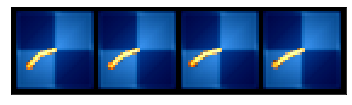

In [448]:
y =  torch.index_select(x, 0, indices)
display_image_grid(y[:16],nrow=4)

In [428]:
print(scores.mean(),scores.std())

tensor(5.8503, device='cuda:0', grad_fn=<MeanBackward0>) tensor(15.0535, device='cuda:0', grad_fn=<StdBackward0>)


In [158]:
from rlsink.utils.data import load_data_and_data_loaders,load_model

data_file_path = '/home/misha/research/vqvae/data/reacher_no_target_length100_paths_2000.npy'
model_filename = '/home/misha/research/vqvae/results/vqvae_data_reacher_aug7_ne128nd2.pth'


model,vqvae_data = load_model(model_filename)

tr_data, v_data, tr_loader, v_loader = load_data_and_data_loaders(data_file_path, 100,shuffle=False,include_state=True)

Loading data
Done loading data
Loading data
Done loading data


In [160]:

import torch
import torchvision
import torch.utils.data
import random
from torch.utils.data.sampler import Sampler
import torch.nn as nn
import torch.optim as optim
import numpy as np
"""
CREATING NODES
"""
device = torch.device(
            "cuda") if torch.cuda.is_available() else torch.device("cpu")
def vqvae_encoder_as_numpy(x,model):
    x = x.to(device)
    z = model.pre_quantization_conv(model.encoder(x))
    return z.detach().cpu().numpy()

def L2(x1,x2):
    return np.linalg.norm(x1-x2)

def polyak_avg(x1,x2,beta=0.95):
    return beta * x1 + (1-beta)*x2
    
def create_node_list(data,
                     vqvae_model,
                     threshold=0.1,
                     n_starting_nodes=1,
                     batch_size=100,
                     z_dim=128
                    ):
    loader = torch.utils.data.DataLoader(data, shuffle=False, batch_size=batch_size)
    random_loader = torch.utils.data.DataLoader(data, shuffle=True, batch_size=n_starting_nodes)
    
    init_images = next(iter(random_loader))[0]
    nodes = vqvae_encoder_as_numpy(init_images,vqvae_model)
    
    for i,batch in enumerate(iter(loader)):
        print(i,end='\r')
        images = batch[0]
        latents = vqvae_encoder_as_numpy(images,vqvae_model)
        for z in latents:
            # find closest node in graph
            distances = np.linalg.norm(nodes.reshape(-1,128)-z.reshape(-1),axis=1)
            min_idx = np.argmin(distances)
            min_dist = distances[min_idx]
            
            if min_dist < threshold:
                nodes[min_idx] = polyak_avg(nodes[min_idx],z)
            else:
                new_node = np.expand_dims(z, axis=0)
                nodes = np.concatenate((nodes, new_node),axis=0)
            
    """
    # prune any nodes that are too close
    distances = []
    final_nodes = []
    o_nodes = nodes.copy()
    nodes = list(nodes)
    i = 0
    while len(nodes):
        z = nodes.pop()
        i+=1
        # find closest node in graph
        d = np.linalg.norm(np.array(nodes).reshape(-1,128)-z.reshape(-1),axis=1)
        if len(d):
            min_idx = np.argmin(d)
            min_dist = d[min_idx]
            if min_dist <= threshold:
                final_nodes.append(np.expand_dims(z,0))
    print(i)
    
    final_nodes= np.concatenate(final_nodes,0)
    
    
    
    redundant_node_ids = []
    for ref_id,z in enumerate(nodes):
        d = np.linalg.norm(nodes.reshape(-1,128)-z.reshape(-1),axis=1)
        
        node_ids = np.where(d<threshold)
        print(len(node_ids))
        for i in node_ids:
            nodes[ref_id] = polyak_avg(nodes[i],z)
            redundant_node_ids.append(i)
    """ 
            
    
    return nodes
    
    
nodes = create_node_list(tr_data,
                 model,
                 threshold=0.1,
                 n_starting_nodes=100,
                 batch_size=100,
                 z_dim=128)


print(nodes.shape,f_nodes.shape)

(1714, 2, 8, 8) (24, 2, 8, 8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


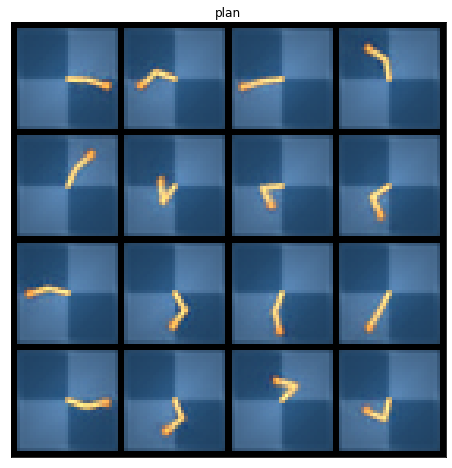

In [161]:
"""
Visualize nodes
"""
from torchvision.utils import make_grid
import torch 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def normalize_tensor(x):
    x *=.5
    x+=.5
    x*=255.
    return x.int()

def display_image_grid(x,nrow=8):
    x = normalize_tensor(x).int()
    x = make_grid(x.cpu().detach(),nrow=nrow)
    x = x.numpy()
    

    fig2 = plt.figure(figsize = (16,8)) # create a 5 x 5 figure 
    ax3 = fig2.add_subplot(111)
    ax3.imshow(np.transpose(x, (1,2,0)), interpolation='none')
    ax3.set_title('plan')
    ax3.axes.get_xaxis().set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)

    plt.show()
def decode_nodes(nodes,model):
    nodes = torch.tensor(nodes).float()
    nodes = nodes.to(device)
    _, z_q, _, _,e_indices = model.vector_quantization(nodes)
    x = model.decoder(z_q)

    return x
x = decode_nodes(nodes,model)
display_image_grid(x[:16],nrow=4)

In [189]:
"""
Build edges with retrieval network
"""
from rlsink.classifiers.cpc import CPC,CPCSampler
path = '/home/misha/research/rlsink/saved/cpc_weights3.pth'

n = 100
T=10
n_neg = 50
batch_size = 1
cpc_batch_size = n_neg+2
total_samples = batch_size*cpc_batch_size

sampler = CPCSampler(tr_data,path_length=n,proximity_threshold=T,n_negative=n_neg,batch_size=batch_size)


loader = torch.utils.data.DataLoader(tr_data, sampler=sampler, batch_size=total_samples)

cpc_model = CPC(z_dim=128,
             cpc_batch=52,
             batch_size=1,
             loader=loader).cuda()

cpc_model.load_state_dict(torch.load(path))
cpc_model.eval()

nodes = torch.tensor(nodes).float().to(device)
scores = []
for i,n in enumerate(nodes): 

    scores.append(cpc_model.naive_forward(n,nodes))
scores = torch.cat(scores,1)



In [190]:
"""
Calculate distances between all nodes
"""

"""distances = []
for z in nodes.detach().cpu().numpy():
    # find closest node in graph
    d = np.linalg.norm(nodes.detach().cpu().numpy().reshape(-1,128)-z.reshape(-1),axis=1)
    distances.append(d)
distances = np.array(distances)
print(distances.shape)"""

'distances = []\nfor z in nodes.detach().cpu().numpy():\n    # find closest node in graph\n    d = np.linalg.norm(nodes.detach().cpu().numpy().reshape(-1,128)-z.reshape(-1),axis=1)\n    distances.append(d)\ndistances = np.array(distances)\nprint(distances.shape)'

In [191]:
import torch.nn.functional as F

# preprocess scores
clean_scores =torch.log(scores).detach().cpu() #torch.log

#print(clean_scores.mean())
#assert False
#vg,std = clean_scores.mean(),clean_scores.std()
#clean_scores = (clean_scores - avg)/std
clean_scores = torch.exp(-clean_scores)

# exp(-x) as final score
alpha = 1.5
gamma = 0
#weights = torch.exp(-alpha*clean_scores)+(gamma*torch.tensor(distances))
weights = clean_scores
sigmoids = F.sigmoid(clean_scores)

# make diagonal weights infinite
#print('scores')
#print(clean_scores.shape)
#print('sigmoids')
#print(sigmoids.shape)
#print('weights')
#print(weights)



In [192]:
np_scores = clean_scores.detach().cpu().numpy()

In [193]:
print(np_scores.mean(),np.median(np_scores),np_scores.min(),np_scores.max())

363.10916 0.0037620794 1.9529893e-15 2156577.5


In [194]:
import networkx as nx
G = nx.Graph()
for i, n_i  in enumerate(nodes):
    for j, n_j  in enumerate(nodes):
        #if i!=j:
        # add score minimum criteria
        G.add_edge(i, j, weight=clean_scores[i,j].detach().cpu().numpy())

In [195]:
n = len(G)
a = 0#np.random.randint(n)
b = np.random.randint(n)
path_ids = nx.dijkstra_path(G,a,b)
path_nodes = nodes[path_ids,:]
print(path_ids)

[0, 694, 245, 737, 739, 773, 1388, 906, 882, 1073, 1577, 871, 870, 909, 26, 1540, 147, 1649]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


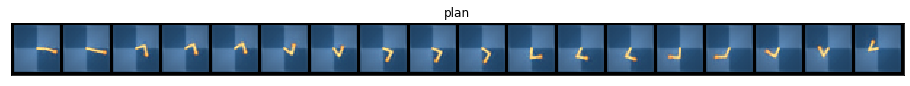

In [196]:
import warnings
warnings.filterwarnings('ignore')


    
x = decode_nodes(path_nodes,model)
display_image_grid(x[:],nrow=len(path_ids))

In [197]:
def markov_chain_distances(nodes):

    distances = []
    for i,n in enumerate(nodes):
        if i>0:
            distance = L2(n,nodes[i-1])
            distances.append(distance)
    return distances

markov_chain_distances(path_nodes.detach().cpu().numpy())
        

[0.1994515,
 0.5612959,
 0.18140638,
 0.09068219,
 0.41596082,
 0.287085,
 0.4265386,
 0.073755205,
 0.14255771,
 0.55816096,
 0.35649705,
 0.13512334,
 0.4281954,
 0.32125795,
 0.40061897,
 0.37006903,
 0.5651308]